Part 1. Data Preprocessing

In [10]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
################ Loading data from csv file ################

def load_data(split):
    with open(split + '.csv') as f:
        data = []
        for line in f.readlines():
            if split != 'test':
                Id, region, date, mortality_rate, O3, PM10, PM25, NO2, T2M = line.split(',')
                data.append([float(mortality_rate.strip()), float(O3.strip()), float(PM10.strip()), float(PM25.strip()), float(NO2.strip()), float(T2M.strip())])
            else:
                Id, region, date, O3, PM10, PM25, NO2, T2M = line.split(',')
                data.append([float(O3.strip()), float(PM10.strip()), float(PM25.strip()), float(NO2.strip()), float(T2M.strip())])
        return data
    
data_2k = load_data('train_2k')
data_4k = load_data('train_4k')
data_6k = load_data('train_6k')
data_8k = load_data('train_8k')
data_10k = load_data('train_10k')
val_data = load_data('validation')

print ('Length of data_2k: ', len(data_2k))
print ('Length of data_4k: ', len(data_4k))
print ('Length of data_6k: ', len(data_6k))
print ('Length of data_8k: ', len(data_8k))
print ('Length of data_10k: ', len(data_10k))
print ('Length of val_data: ', len(val_data))

data_2k = np.asarray(data_2k)
data_4k = np.asarray(data_4k)
data_6k = np.asarray(data_6k)
data_8k = np.asarray(data_8k)
data_10k = np.asarray(data_10k)
val_data = np.asarray(val_data)

Y_2k = data_2k[:, 0:1].reshape(len(data_2k))
Y_4k = data_4k[:, 0:1].reshape(len(data_4k))
Y_6k = data_6k[:, 0:1].reshape(len(data_6k))
Y_8k = data_8k[:, 0:1].reshape(len(data_8k))
Y_10k = data_10k[:, 0:1].reshape(len(data_10k))
Y_val = val_data[:, 0:1].reshape(len(val_data))

X_2k = data_2k[:, 1:]
X_4k = data_4k[:, 1:]
X_6k = data_6k[:, 1:]
X_8k = data_8k[:, 1:]
X_10k = data_10k[:, 1:]
X_val = val_data[:, 1:]

print (len(Y_10k))
print (len(X_10k))
print (data_10k)
print (X_10k)
print (Y_10k)

print (len(Y_val))
print (len(X_val))
print (val_data)
print (Y_val)
print (X_val)

################ Normalization ################
X_2k = (X_2k - np.mean(X_2k, axis = 0)) / (np.max(X_2k, axis = 0) - np.min(X_2k, axis = 0))
X_4k = (X_4k - np.mean(X_4k, axis = 0)) / (np.max(X_4k, axis = 0) - np.min(X_4k, axis = 0))
X_6k = (X_6k - np.mean(X_6k, axis = 0)) / (np.max(X_6k, axis = 0) - np.min(X_6k, axis = 0))
X_8k = (X_8k - np.mean(X_8k, axis = 0)) / (np.max(X_8k, axis = 0) - np.min(X_8k, axis = 0))
X_10k = (X_10k - np.mean(X_10k, axis = 0)) / (np.max(X_10k, axis = 0) - np.min(X_10k, axis = 0))
X_val = (X_val - np.mean(X_val, axis = 0)) / (np.max(X_val, axis = 0) - np.min(X_val, axis = 0))

print (X_10k)
print (np.max(X_10k, axis = 0))
print (np.min(X_10k, axis = 0))
print (np.mean(X_10k, axis = 0))

print (X_2k.shape)
print (Y_2k.shape)
print (X_4k.shape)
print (Y_4k.shape)
print (X_6k.shape)
print (Y_6k.shape)
print (X_8k.shape)
print (Y_8k.shape)
print (X_10k.shape)
print (Y_10k.shape)
print (X_val.shape)
print (Y_val.shape)

Length of data_2k:  2000
Length of data_4k:  4000
Length of data_6k:  6000
Length of data_8k:  8000
Length of data_10k:  10000
Length of val_data:  1833
10000
10000
[[   2.213   22.833    9.614    4.078    7.882  273.262]
 [   2.446   26.065    8.584    3.71    11.312  273.857]
 [   2.174   35.166   14.295    2.911    6.419  272.466]
 ..., 
 [   1.185   84.64    21.375   16.496   10.17   290.576]
 [   0.914   93.455   20.009   15.675    8.701  290.413]
 [   0.829   86.743   18.619   15.244   11.722  290.797]]
[[  22.833    9.614    4.078    7.882  273.262]
 [  26.065    8.584    3.71    11.312  273.857]
 [  35.166   14.295    2.911    6.419  272.466]
 ..., 
 [  84.64    21.375   16.496   10.17   290.576]
 [  93.455   20.009   15.675    8.701  290.413]
 [  86.743   18.619   15.244   11.722  290.797]]
[ 2.213  2.446  2.174 ...,  1.185  0.914  0.829]
1833
1833
[[   2.136   25.138    9.782    4.191   10.023  275.284]
 [   1.747   22.819   22.481   11.908   17.42   275.339]
 [   1.67    26.

Part 2. Model Training with RBF Kernel and Parameters Selecting

In [3]:
################ Using 2k training set ################

# Run with different parameters
for c in [0.1, 1, 10, 100, 1000]:
    for Gamma in [1, 10, 100]:
        svr_rbf = SVR(kernel='rbf', C = c, gamma = Gamma)
        y_rbf = svr_rbf.fit(X_2k, Y_2k).predict(X_2k)
        val_rbf = svr_rbf.fit(X_2k, Y_2k).predict(X_val)
        print ('C is:', c)
        print ('Gamma is:', Gamma)
        print ('Train Error:', np.mean((y_rbf - Y_2k)**2))
        print ('Validation Error:', np.mean((val_rbf - Y_val)**2))

C is: 0.1
Gamma is: 1
Train Error: 0.0501759232099
Validation Error: 0.054666882816
C is: 0.1
Gamma is: 10
Train Error: 0.0463983946165
Validation Error: 0.0535482232636
C is: 0.1
Gamma is: 100
Train Error: 0.0425136646941
Validation Error: 0.0597395085046
C is: 1
Gamma is: 1
Train Error: 0.0476986826785
Validation Error: 0.0550490367862
C is: 1
Gamma is: 10
Train Error: 0.0424560872215
Validation Error: 0.0555940032673
C is: 1
Gamma is: 100
Train Error: 0.0215315966291
Validation Error: 0.0622844921053
C is: 10
Gamma is: 1
Train Error: 0.0466583013384
Validation Error: 0.0553319199082
C is: 10
Gamma is: 10
Train Error: 0.0389785679703
Validation Error: 0.0593968713206
C is: 10
Gamma is: 100
Train Error: 0.013103981512
Validation Error: 0.0889683711382
C is: 100
Gamma is: 1
Train Error: 0.0454303737095
Validation Error: 0.0560936971552
C is: 100
Gamma is: 10
Train Error: 0.0347572041261
Validation Error: 0.0745740982098
C is: 100
Gamma is: 100
Train Error: 0.00957797516753
Validation E

In [5]:
################ Using 4k training set ################

# Run with different parameters
for c in [0.1, 1, 10, 100, 1000]:
    for Gamma in [1, 10, 100]:
        svr_rbf = SVR(kernel='rbf', C = c, gamma = Gamma)
        y_rbf = svr_rbf.fit(X_4k, Y_4k).predict(X_4k)
        val_rbf = svr_rbf.fit(X_4k, Y_4k).predict(X_val)
        print ('C is:', c)
        print ('Gamma is:', Gamma)
        print ('Train Error:', np.mean((y_rbf - Y_4k)**2))
        print ('Validation Error:', np.mean((val_rbf - Y_val)**2))

C is: 0.1
Gamma is: 1
Train Error: 0.0523170069829
Validation Error: 0.0543414310423
C is: 0.1
Gamma is: 10
Train Error: 0.0488172161241
Validation Error: 0.0532455489074
C is: 0.1
Gamma is: 100
Train Error: 0.0449006316603
Validation Error: 0.0556741797454
C is: 1
Gamma is: 1
Train Error: 0.0503483418727
Validation Error: 0.0555326374888
C is: 1
Gamma is: 10
Train Error: 0.0459863109828
Validation Error: 0.0537538678277
C is: 1
Gamma is: 100
Train Error: 0.0281216323707
Validation Error: 0.0529377438133
C is: 10
Gamma is: 1
Train Error: 0.0493875049019
Validation Error: 0.0561644879169
C is: 10
Gamma is: 10
Train Error: 0.0434298412108
Validation Error: 0.0555411340707
C is: 10
Gamma is: 100
Train Error: 0.0192462785205
Validation Error: 0.0668703898521
C is: 100
Gamma is: 1
Train Error: 0.0484123518596
Validation Error: 0.0561989858125
C is: 100
Gamma is: 10
Train Error: 0.0405443393386
Validation Error: 0.0653831278036
C is: 100
Gamma is: 100
Train Error: 0.0134565351222
Validation 

In [6]:
################ Using 6k training set ################

# Run with different parameters
for c in [0.1, 1, 10, 100, 1000]:
    for Gamma in [1, 10, 100]:
        svr_rbf = SVR(kernel='rbf', C = c, gamma = Gamma)
        y_rbf = svr_rbf.fit(X_6k, Y_6k).predict(X_6k)
        val_rbf = svr_rbf.fit(X_6k, Y_6k).predict(X_val)
        print ('C is:', c)
        print ('Gamma is:', Gamma)
        print ('Train Error:', np.mean((y_rbf - Y_6k)**2))
        print ('Validation Error:', np.mean((val_rbf - Y_val)**2))

C is: 0.1
Gamma is: 1
Train Error: 0.0511328823447
Validation Error: 0.0540101239294
C is: 0.1
Gamma is: 10
Train Error: 0.0478595160597
Validation Error: 0.0526885791251
C is: 0.1
Gamma is: 100
Train Error: 0.0430899080376
Validation Error: 0.0532646437638
C is: 1
Gamma is: 1
Train Error: 0.0498096898368
Validation Error: 0.0545449070598
C is: 1
Gamma is: 10
Train Error: 0.0453755153147
Validation Error: 0.052377358362
C is: 1
Gamma is: 100
Train Error: 0.0300214650278
Validation Error: 0.0486550953955
C is: 10
Gamma is: 1
Train Error: 0.0488929149089
Validation Error: 0.0549409102553
C is: 10
Gamma is: 10
Train Error: 0.0431426449067
Validation Error: 0.0527847570498
C is: 10
Gamma is: 100
Train Error: 0.0222109396598
Validation Error: 0.0564803317097
C is: 100
Gamma is: 1
Train Error: 0.0478006536845
Validation Error: 0.0542320935099
C is: 100
Gamma is: 10
Train Error: 0.0408924897971
Validation Error: 0.0581468880617
C is: 100
Gamma is: 100
Train Error: 0.0164206685353
Validation E

In [7]:
################ Using 8k training set ################

# Run with different parameters
for c in [0.1, 1, 10, 100, 1000]:
    if c != 1000:
        for Gamma in [1, 10, 100]:
            svr_rbf = SVR(kernel='rbf', C = c, gamma = Gamma)
            y_rbf = svr_rbf.fit(X_8k, Y_8k).predict(X_8k)
            val_rbf = svr_rbf.fit(X_8k, Y_8k).predict(X_val)
            print ('C is:', c)
            print ('Gamma is:', Gamma)
            print ('Train Error:', np.mean((y_rbf - Y_8k)**2))
            print ('Validation Error:', np.mean((val_rbf - Y_val)**2))
    else:
        svr_rbf = SVR(kernel='rbf', C = c, gamma = 1)
        y_rbf = svr_rbf.fit(X_8k, Y_8k).predict(X_8k)
        val_rbf = svr_rbf.fit(X_8k, Y_8k).predict(X_val)
        print ('C is:', c)
        print ('Gamma is: 1')
        print ('Train Error:', np.mean((y_rbf - Y_8k)**2))
        print ('Validation Error:', np.mean((val_rbf - Y_val)**2))

C is: 0.1
Gamma is: 1
Train Error: 0.0496494800841
Validation Error: 0.0540337120035
C is: 0.1
Gamma is: 10
Train Error: 0.0467245485897
Validation Error: 0.0524423019178
C is: 0.1
Gamma is: 100
Train Error: 0.0422054906293
Validation Error: 0.0518478635512
C is: 1
Gamma is: 1
Train Error: 0.0484957932632
Validation Error: 0.054547899197
C is: 1
Gamma is: 10
Train Error: 0.0447370424446
Validation Error: 0.0520765094564
C is: 1
Gamma is: 100
Train Error: 0.0313046261623
Validation Error: 0.046277968833
C is: 10
Gamma is: 1
Train Error: 0.047702835743
Validation Error: 0.0545505489135
C is: 10
Gamma is: 10
Train Error: 0.0429949227391
Validation Error: 0.0520696653912
C is: 10
Gamma is: 100
Train Error: 0.0241725121889
Validation Error: 0.052476180348
C is: 100
Gamma is: 1
Train Error: 0.0468494723218
Validation Error: 0.0541029661158
C is: 100
Gamma is: 10
Train Error: 0.0412007065875
Validation Error: 0.0577773271638
C is: 100
Gamma is: 100
Train Error: 0.0186175136438
Validation Erro

In [8]:
################ Using 10k training set ################

# Run with different parameters
for c in [0.1, 1, 10, 100, 1000]:
    if c != 1000:
        for Gamma in [1, 10, 100]:
            svr_rbf = SVR(kernel='rbf', C = c, gamma = Gamma)
            y_rbf = svr_rbf.fit(X_10k, Y_10k).predict(X_10k)
            val_rbf = svr_rbf.fit(X_10k, Y_10k).predict(X_val)
            print ('C is:', c)
            print ('Gamma is:', Gamma)
            print ('Train Error:', np.mean((y_rbf - Y_10k)**2))
            print ('Validation Error:', np.mean((val_rbf - Y_val)**2))
    else:
        svr_rbf = SVR(kernel='rbf', C = c, gamma = 1)
        y_rbf = svr_rbf.fit(X_10k, Y_10k).predict(X_10k)
        val_rbf = svr_rbf.fit(X_10k, Y_10k).predict(X_val)
        print ('C is:', c)
        print ('Gamma is:', Gamma)
        print ('Train Error:', np.mean((y_rbf - Y_10k)**2))
        print ('Validation Error:', np.mean((val_rbf - Y_val)**2))

C is: 0.1
Gamma is: 1
Train Error: 0.0498190043888
Validation Error: 0.0539253473037
C is: 0.1
Gamma is: 10
Train Error: 0.0469314625868
Validation Error: 0.0522933254786
C is: 0.1
Gamma is: 100
Train Error: 0.0422931428952
Validation Error: 0.0507773646391
C is: 1
Gamma is: 1
Train Error: 0.0487379000785
Validation Error: 0.0544966683179
C is: 1
Gamma is: 10
Train Error: 0.0450424447992
Validation Error: 0.0517840498305
C is: 1
Gamma is: 100
Train Error: 0.0324285313405
Validation Error: 0.0447174923092
C is: 10
Gamma is: 1
Train Error: 0.0479199997128
Validation Error: 0.0543964602547
C is: 10
Gamma is: 10
Train Error: 0.0434825838142
Validation Error: 0.052017193938
C is: 10
Gamma is: 100
Train Error: 0.0257073868745
Validation Error: 0.0488632744146
C is: 100
Gamma is: 1
Train Error: 0.0470045547486
Validation Error: 0.0540842628331
C is: 100
Gamma is: 10
Train Error: 0.0418140979362
Validation Error: 0.0570597320968
C is: 100
Gamma is: 100
Train Error: 0.0203091637741
Validation E

Part 3. RBF Performance Comparasion with Different Training Set

In [22]:
c = 1
Gamma = 100

################ Using 2k training set ################
svr_rbf = SVR(kernel='rbf', C = c, gamma = Gamma)
y_rbf = svr_rbf.fit(X_2k, Y_2k).predict(X_2k)
val_rbf = svr_rbf.fit(X_2k, Y_2k).predict(X_val)
train_err_2k = np.mean((y_rbf - Y_2k)**2)
val_err_2k = np.mean((val_rbf - Y_val)**2)

################ Using 4k training set ################
svr_rbf = SVR(kernel='rbf', C = c, gamma = Gamma)
y_rbf = svr_rbf.fit(X_4k, Y_4k).predict(X_4k)
val_rbf = svr_rbf.fit(X_4k, Y_4k).predict(X_val)
train_err_4k = np.mean((y_rbf - Y_4k)**2)
val_err_4k = np.mean((val_rbf - Y_val)**2)

################ Using 6k training set ################
svr_rbf = SVR(kernel='rbf', C = c, gamma = Gamma)
y_rbf = svr_rbf.fit(X_6k, Y_6k).predict(X_6k)
val_rbf = svr_rbf.fit(X_6k, Y_6k).predict(X_val)
train_err_6k = np.mean((y_rbf - Y_6k)**2)
val_err_6k = np.mean((val_rbf - Y_val)**2)

################ Using 8k training set ################
svr_rbf = SVR(kernel='rbf', C = c, gamma = Gamma)
y_rbf = svr_rbf.fit(X_8k, Y_8k).predict(X_8k)
val_rbf = svr_rbf.fit(X_8k, Y_8k).predict(X_val)
train_err_8k = np.mean((y_rbf - Y_8k)**2)
val_err_8k = np.mean((val_rbf - Y_val)**2)

################ Using 10k training set ################
svr_rbf = SVR(kernel='rbf', C = c, gamma = Gamma)
y_rbf = svr_rbf.fit(X_10k, Y_10k).predict(X_10k)
val_rbf = svr_rbf.fit(X_10k, Y_10k).predict(X_val)
train_err_10k = np.mean((y_rbf - Y_10k)**2)
val_err_10k = np.mean((val_rbf - Y_val)**2)

################ Displaying Errors ################
print ('2k Train Error:', train_err_2k)
print ('4k Train Error:', train_err_4k)
print ('6k Train Error:', train_err_6k)
print ('8k Train Error:', train_err_8k)
print ('10k Train Error:', train_err_10k)
print ('2k Validation Error:', val_err_2k)
print ('4k Validation Error:', val_err_4k)
print ('6k Validation Error:', val_err_6k)
print ('8k Validation Error:', val_err_8k)
print ('10k Validation Error:', val_err_10k)

2k Train Error: 0.0215315966291
4k Train Error: 0.0281216323707
6k Train Error: 0.0300214650278
8k Train Error: 0.0313046261623
10k Train Error: 0.0324285313405
2k Validation Error: 0.0622844921053
4k Validation Error: 0.0529377438133
6k Validation Error: 0.0486550953955
8k Validation Error: 0.046277968833
10k Validation Error: 0.0447174923092


Part 4. Displaying Results For SVR with RBF Kernel

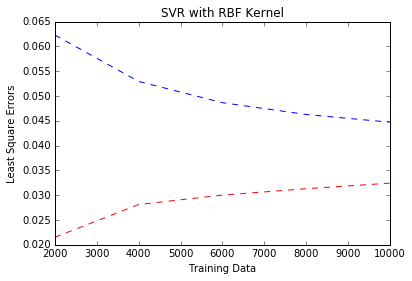

In [25]:
################ Ploting ################
X = [2000, 4000, 6000, 8000, 10000]
train_errors = [train_err_2k, train_err_4k, train_err_6k, train_err_8k, train_err_10k]
val_errors = [val_err_2k, val_err_4k, val_err_6k, val_err_8k, val_err_10k]

plt.plot(X, train_errors, 'r--', X, val_errors, 'b--')
plt.xlabel('Training Data')
plt.ylabel('Least Square Errors')
plt.title('SVR with RBF Kernel')
plt.show()

Part 5. Model Training with Linear Kernel and Parameters Selecting

In [15]:
################ Using 2k training set ################

# Run with different parameters
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    svr_linear = SVR(kernel='linear', C = c)
    y_linear = svr_linear.fit(X_2k, Y_2k).predict(X_2k)
    val_linear = svr_linear.fit(X_2k, Y_2k).predict(X_val)
    print ('C is:', c)
    print ('Train Error:', np.mean((y_linear - Y_2k)**2))
    print ('Validation Error:', np.mean((val_linear - Y_val)**2))

C is: 0.001
Train Error: 0.0770338805315
Validation Error: 0.078458038865
C is: 0.01
Train Error: 0.0612475689766
Validation Error: 0.0642518932787
C is: 0.1
Train Error: 0.053808724697
Validation Error: 0.0586515182779
C is: 1
Train Error: 0.0530234504685
Validation Error: 0.0596434796425
C is: 10
Train Error: 0.0530305176647
Validation Error: 0.059882841211
C is: 100
Train Error: 0.0530019380585
Validation Error: 0.0599550951486
C is: 1000
Train Error: 0.0530046012745
Validation Error: 0.0599722344942
C is: 10000
Train Error: 0.0530000239243
Validation Error: 0.0599457934272


In [16]:
################ Using 4k training set ################

# Run with different parameters
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    svr_linear = SVR(kernel='linear', C = c)
    y_linear = svr_linear.fit(X_4k, Y_4k).predict(X_4k)
    val_linear = svr_linear.fit(X_4k, Y_4k).predict(X_val)
    print ('C is:', c)
    print ('Train Error:', np.mean((y_linear - Y_4k)**2))
    print ('Validation Error:', np.mean((val_linear - Y_val)**2))

C is: 0.001
Train Error: 0.0776000951819
Validation Error: 0.0746613372802
C is: 0.01
Train Error: 0.0620793503563
Validation Error: 0.0606090447223
C is: 0.1
Train Error: 0.0569439646463
Validation Error: 0.0584855905392
C is: 1
Train Error: 0.0565252356823
Validation Error: 0.0595770903358
C is: 10
Train Error: 0.0564774862262
Validation Error: 0.0596174585784
C is: 100
Train Error: 0.0564910199588
Validation Error: 0.0596665016561
C is: 1000
Train Error: 0.056487295072
Validation Error: 0.0596901044929
C is: 10000
Train Error: 0.0564893073944
Validation Error: 0.0596401499548


In [17]:
################ Using 6k training set ################

# Run with different parameters
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    svr_linear = SVR(kernel='linear', C = c)
    y_linear = svr_linear.fit(X_6k, Y_6k).predict(X_6k)
    val_linear = svr_linear.fit(X_6k, Y_6k).predict(X_val)
    print ('C is:', c)
    print ('Train Error:', np.mean((y_linear - Y_6k)**2))
    print ('Validation Error:', np.mean((val_linear - Y_val)**2))

C is: 0.001
Train Error: 0.0725359956235
Validation Error: 0.071639680341
C is: 0.01
Train Error: 0.0590252730109
Validation Error: 0.0593442440852
C is: 0.1
Train Error: 0.0557964911253
Validation Error: 0.0579282969344
C is: 1
Train Error: 0.0556044991861
Validation Error: 0.0584734435198
C is: 10
Train Error: 0.0555933359135
Validation Error: 0.0586437442205
C is: 100
Train Error: 0.0555909383326
Validation Error: 0.058651334879
C is: 1000
Train Error: 0.0555961425435
Validation Error: 0.0586578278467
C is: 10000
Train Error: 0.0555973203964
Validation Error: 0.0586939725622


In [18]:
################ Using 8k training set ################

# Run with different parameters
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    svr_linear = SVR(kernel='linear', C = c)
    y_linear = svr_linear.fit(X_8k, Y_8k).predict(X_8k)
    val_linear = svr_linear.fit(X_8k, Y_8k).predict(X_val)
    print ('C is:', c)
    print ('Train Error:', np.mean((y_linear - Y_8k)**2))
    print ('Validation Error:', np.mean((val_linear - Y_val)**2))

C is: 0.001
Train Error: 0.0691938519018
Validation Error: 0.0695825947846
C is: 0.01
Train Error: 0.0566124215312
Validation Error: 0.0584314504213
C is: 0.1
Train Error: 0.0540306780304
Validation Error: 0.0581717373533
C is: 1
Train Error: 0.0538861772584
Validation Error: 0.0588624211963
C is: 10
Train Error: 0.0538838569286
Validation Error: 0.0589459223085
C is: 100
Train Error: 0.0538850173963
Validation Error: 0.0589710027418
C is: 1000
Train Error: 0.0538846354249
Validation Error: 0.0589888735521


In [19]:
################ Using 10k training set ################

# Run with different parameters
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svr_linear = SVR(kernel='linear', C = c)
    y_linear = svr_linear.fit(X_10k, Y_10k).predict(X_10k)
    val_linear = svr_linear.fit(X_10k, Y_10k).predict(X_val)
    print ('C is:', c)
    print ('Train Error:', np.mean((y_linear - Y_10k)**2))
    print ('Validation Error:', np.mean((val_linear - Y_val)**2))

C is: 0.001
Train Error: 0.0679688270857
Validation Error: 0.0682798913026
C is: 0.01
Train Error: 0.0564882786601
Validation Error: 0.0580998896997
C is: 0.1
Train Error: 0.0543612351433
Validation Error: 0.0582880959049
C is: 1
Train Error: 0.0542501404053
Validation Error: 0.0589328634731
C is: 10
Train Error: 0.0542327707811
Validation Error: 0.0589667440764
C is: 100
Train Error: 0.0542365308288
Validation Error: 0.0589699097999


Part 6. Linear Kernel Performance Comparasion with Different Training Set

In [20]:
c = 0.1

################ Using 2k training set ################
svr_linear = SVR(kernel='linear', C = c)
y_linear = svr_linear.fit(X_2k, Y_2k).predict(X_2k)
val_linear = svr_linear.fit(X_2k, Y_2k).predict(X_val)
train_err_2k = np.mean((y_linear - Y_2k)**2)
val_err_2k = np.mean((val_linear - Y_val)**2)

################ Using 4k training set ################
svr_linear = SVR(kernel='linear', C = c)
y_linear = svr_linear.fit(X_4k, Y_4k).predict(X_4k)
val_linear = svr_linear.fit(X_4k, Y_4k).predict(X_val)
train_err_4k = np.mean((y_linear - Y_4k)**2)
val_err_4k = np.mean((val_linear - Y_val)**2)

################ Using 6k training set ################
svr_linear = SVR(kernel='linear', C = c)
y_linear = svr_linear.fit(X_6k, Y_6k).predict(X_6k)
val_linear = svr_linear.fit(X_6k, Y_6k).predict(X_val)
train_err_6k = np.mean((y_linear - Y_6k)**2)
val_err_6k = np.mean((val_linear - Y_val)**2)

################ Using 8k training set ################
svr_linear = SVR(kernel='linear', C = c)
y_linear = svr_linear.fit(X_8k, Y_8k).predict(X_8k)
val_linear = svr_linear.fit(X_8k, Y_8k).predict(X_val)
train_err_8k = np.mean((y_linear - Y_8k)**2)
val_err_8k = np.mean((val_linear - Y_val)**2)

################ Using 10k training set ################
svr_linear = SVR(kernel='linear', C = c)
y_linear = svr_linear.fit(X_10k, Y_10k).predict(X_10k)
val_linear = svr_linear.fit(X_10k, Y_10k).predict(X_val)
train_err_10k = np.mean((y_linear - Y_10k)**2)
val_err_10k = np.mean((val_linear - Y_val)**2)

################ Displaying Errors ################
print ('2k Train Error:', train_err_2k)
print ('4k Train Error:', train_err_4k)
print ('6k Train Error:', train_err_6k)
print ('8k Train Error:', train_err_8k)
print ('10k Train Error:', train_err_10k)
print ('2k Validation Error:', val_err_2k)
print ('4k Validation Error:', val_err_4k)
print ('6k Validation Error:', val_err_6k)
print ('8k Validation Error:', val_err_8k)
print ('10k Validation Error:', val_err_10k)

2k Train Error: 0.053808724697
4k Train Error: 0.0569439646463
6k Train Error: 0.0557964911253
8k Train Error: 0.0540306780304
10k Train Error: 0.0543612351433
2k Validation Error: 0.0586515182779
4k Validation Error: 0.0584855905392
6k Validation Error: 0.0579282969344
8k Validation Error: 0.0581717373533
10k Validation Error: 0.0582880959049


Part 7. Displaying Results For SVR with Linear Kernel

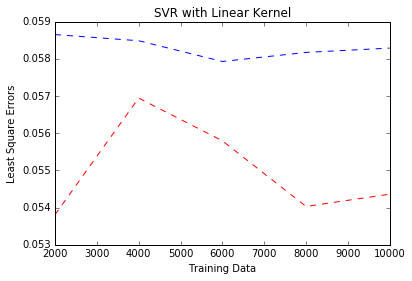

In [21]:
################ Ploting ################
X = [2000, 4000, 6000, 8000, 10000]
train_errors = [train_err_2k, train_err_4k, train_err_6k, train_err_8k, train_err_10k]
val_errors = [val_err_2k, val_err_4k, val_err_6k, val_err_8k, val_err_10k]

plt.plot(X, train_errors, 'r--', X, val_errors, 'b--')
plt.xlabel('Training Data')
plt.ylabel('Least Square Errors')
plt.title('SVR with Linear Kernel')
plt.show()

Part 8. Model Training with Polynominal Kernel and Parameters Selecting

In [26]:
################ Using 2k training set ################

# Run with different parameters
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    svr_poly = SVR(kernel='poly', C = c, degree = 2)
    y_poly = svr_poly.fit(X_2k, Y_2k).predict(X_2k)
    val_poly = svr_poly.fit(X_2k, Y_2k).predict(X_val)
    print ('C is:', c)
    print ('Train Error:', np.mean((y_poly - Y_2k)**2))
    print ('Validation Error:', np.mean((val_poly - Y_val)**2))

C is: 0.001
Train Error: 0.0835617473016
Validation Error: 0.0843219569072
C is: 0.01
Train Error: 0.0835286585314
Validation Error: 0.0842908658689
C is: 0.1
Train Error: 0.0831562952482
Validation Error: 0.0838993773497
C is: 1
Train Error: 0.0808392688441
Validation Error: 0.0815146593615
C is: 10
Train Error: 0.0768915822601
Validation Error: 0.0784886998486
C is: 100
Train Error: 0.0748776797653
Validation Error: 0.0813796040485
C is: 1000
Train Error: 0.0749887581071
Validation Error: 0.0898465687816
C is: 10000
Train Error: 0.0751477116938
Validation Error: 0.0918519621246


In [27]:
################ Using 4k training set ################

# Run with different parameters
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    svr_poly = SVR(kernel='poly', C = c, degree = 2)
    y_poly = svr_poly.fit(X_4k, Y_4k).predict(X_4k)
    val_poly = svr_poly.fit(X_4k, Y_4k).predict(X_val)
    print ('C is:', c)
    print ('Train Error:', np.mean((y_poly - Y_4k)**2))
    print ('Validation Error:', np.mean((val_poly - Y_val)**2))

C is: 0.001
Train Error: 0.0876763566015
Validation Error: 0.0840656937409
C is: 0.01
Train Error: 0.0876099766347
Validation Error: 0.0839904955893
C is: 0.1
Train Error: 0.0870680948253
Validation Error: 0.0833768727433
C is: 1
Train Error: 0.0841081507985
Validation Error: 0.0801447296099
C is: 10
Train Error: 0.0795658143015
Validation Error: 0.0781537839471
C is: 100
Train Error: 0.0772455288397
Validation Error: 0.082951426592
C is: 1000
Train Error: 0.0772119364595
Validation Error: 0.0919875101177
C is: 10000
Train Error: 0.0773713181526
Validation Error: 0.0943878457362


In [28]:
################ Using 6k training set ################

# Run with different parameters
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    svr_poly = SVR(kernel='poly', C = c, degree = 2)
    y_poly = svr_poly.fit(X_6k, Y_6k).predict(X_6k)
    val_poly = svr_poly.fit(X_6k, Y_6k).predict(X_val)
    print ('C is:', c)
    print ('Train Error:', np.mean((y_poly - Y_6k)**2))
    print ('Validation Error:', np.mean((val_poly - Y_val)**2))

C is: 0.001
Train Error: 0.0858689227925
Validation Error: 0.0839189058075
C is: 0.01
Train Error: 0.0857682231701
Validation Error: 0.0838078486704
C is: 0.1
Train Error: 0.0849020737989
Validation Error: 0.0828532452831
C is: 1
Train Error: 0.0809636487962
Validation Error: 0.0787370455288
C is: 10
Train Error: 0.0768841648403
Validation Error: 0.077208395415
C is: 100
Train Error: 0.0751383281526
Validation Error: 0.0830374203372
C is: 1000
Train Error: 0.0752298161883
Validation Error: 0.0915618714422
C is: 10000
Train Error: 0.0752906030397
Validation Error: 0.0930159859377


In [29]:
################ Using 8k training set ################

# Run with different parameters
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    svr_poly = SVR(kernel='poly', C = c, degree = 2)
    y_poly = svr_poly.fit(X_8k, Y_8k).predict(X_8k)
    val_poly = svr_poly.fit(X_8k, Y_8k).predict(X_val)
    print ('C is:', c)
    print ('Train Error:', np.mean((y_poly - Y_8k)**2))
    print ('Validation Error:', np.mean((val_poly - Y_val)**2))

C is: 0.001
Train Error: 0.0846442093953
Validation Error: 0.0839243465656
C is: 0.01
Train Error: 0.0845319392199
Validation Error: 0.0837939089214
C is: 0.1
Train Error: 0.0834671076762
Validation Error: 0.0825867044372
C is: 1
Train Error: 0.0791966516667
Validation Error: 0.0781160534997
C is: 10
Train Error: 0.0755479638073
Validation Error: 0.0774694535578
C is: 100
Train Error: 0.0740107993648
Validation Error: 0.0857176093381
C is: 1000
Train Error: 0.0741477525532
Validation Error: 0.0934858478094
C is: 10000
Train Error: 0.0742050425935
Validation Error: 0.0946796742108


In [30]:
################ Using 10k training set ################

# Run with different parameters
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    svr_poly = SVR(kernel='poly', C = c, degree = 2)
    y_poly = svr_poly.fit(X_10k, Y_10k).predict(X_10k)
    val_poly = svr_poly.fit(X_10k, Y_10k).predict(X_val)
    print ('C is:', c)
    print ('Train Error:', np.mean((y_poly - Y_10k)**2))
    print ('Validation Error:', np.mean((val_poly - Y_val)**2))

C is: 0.001
Train Error: 0.0846270793896
Validation Error: 0.0839494740705
C is: 0.01
Train Error: 0.0844769165003
Validation Error: 0.0837787086643
C is: 0.1
Train Error: 0.0831764458421
Validation Error: 0.0823210853094
C is: 1
Train Error: 0.0785607505885
Validation Error: 0.0776397928655
C is: 10
Train Error: 0.07505625302
Validation Error: 0.077760193126
C is: 100
Train Error: 0.0736387464348
Validation Error: 0.0870630365958
C is: 1000
Train Error: 0.0737198397524
Validation Error: 0.0935320318937


Part 9. Polynominal Kernel Performance Comparasion with Different Training Set

In [33]:
c = 10

################################################
################   Degree = 2   ################
################################################

################ Using 2k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 2)
y_poly = svr_poly.fit(X_2k, Y_2k).predict(X_2k)
val_poly = svr_poly.fit(X_2k, Y_2k).predict(X_val)
train_err_2k_2 = np.mean((y_poly - Y_2k)**2)
val_err_2k_2 = np.mean((val_poly - Y_val)**2)

################ Using 4k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 2)
y_poly = svr_poly.fit(X_4k, Y_4k).predict(X_4k)
val_poly = svr_poly.fit(X_4k, Y_4k).predict(X_val)
train_err_4k_2 = np.mean((y_poly - Y_4k)**2)
val_err_4k_2 = np.mean((val_poly - Y_val)**2)

################ Using 6k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 2)
y_poly = svr_poly.fit(X_6k, Y_6k).predict(X_6k)
val_poly = svr_poly.fit(X_6k, Y_6k).predict(X_val)
train_err_6k_2 = np.mean((y_poly - Y_6k)**2)
val_err_6k_2 = np.mean((val_poly - Y_val)**2)

################ Using 8k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 2)
y_poly = svr_poly.fit(X_8k, Y_8k).predict(X_8k)
val_poly = svr_poly.fit(X_8k, Y_8k).predict(X_val)
train_err_8k_2 = np.mean((y_poly - Y_8k)**2)
val_err_8k_2 = np.mean((val_poly - Y_val)**2)

################ Using 10k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 2)
y_poly = svr_poly.fit(X_10k, Y_10k).predict(X_10k)
val_poly = svr_poly.fit(X_10k, Y_10k).predict(X_val)
train_err_10k_2 = np.mean((y_poly - Y_10k)**2)
val_err_10k_2 = np.mean((val_poly - Y_val)**2)

################ Displaying Errors ################
print ('**************************************')
print ('Degree = 2')
print ('2k Train Error:', train_err_2k_2)
print ('4k Train Error:', train_err_4k_2)
print ('6k Train Error:', train_err_6k_2)
print ('8k Train Error:', train_err_8k_2)
print ('10k Train Error:', train_err_10k_2)
print ('2k Validation Error:', val_err_2k_2)
print ('4k Validation Error:', val_err_4k_2)
print ('6k Validation Error:', val_err_6k_2)
print ('8k Validation Error:', val_err_8k_2)
print ('10k Validation Error:', val_err_10k_2)
print ('**************************************')

################################################
################   Degree = 5   ################
################################################

################ Using 2k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 5)
y_poly = svr_poly.fit(X_2k, Y_2k).predict(X_2k)
val_poly = svr_poly.fit(X_2k, Y_2k).predict(X_val)
train_err_2k_5 = np.mean((y_poly - Y_2k)**2)
val_err_2k_5 = np.mean((val_poly - Y_val)**2)

################ Using 4k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 5)
y_poly = svr_poly.fit(X_4k, Y_4k).predict(X_4k)
val_poly = svr_poly.fit(X_4k, Y_4k).predict(X_val)
train_err_4k_5 = np.mean((y_poly - Y_4k)**2)
val_err_4k_5 = np.mean((val_poly - Y_val)**2)

################ Using 6k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 5)
y_poly = svr_poly.fit(X_6k, Y_6k).predict(X_6k)
val_poly = svr_poly.fit(X_6k, Y_6k).predict(X_val)
train_err_6k_5 = np.mean((y_poly - Y_6k)**2)
val_err_6k_5 = np.mean((val_poly - Y_val)**2)

################ Using 8k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 5)
y_poly = svr_poly.fit(X_8k, Y_8k).predict(X_8k)
val_poly = svr_poly.fit(X_8k, Y_8k).predict(X_val)
train_err_8k_5 = np.mean((y_poly - Y_8k)**2)
val_err_8k_5 = np.mean((val_poly - Y_val)**2)

################ Using 10k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 5)
y_poly = svr_poly.fit(X_10k, Y_10k).predict(X_10k)
val_poly = svr_poly.fit(X_10k, Y_10k).predict(X_val)
train_err_10k_5 = np.mean((y_poly - Y_10k)**2)
val_err_10k_5 = np.mean((val_poly - Y_val)**2)

################ Displaying Errors ################
print ('**************************************')
print ('Degree = 5')
print ('2k Train Error:', train_err_2k_5)
print ('4k Train Error:', train_err_4k_5)
print ('6k Train Error:', train_err_6k_5)
print ('8k Train Error:', train_err_8k_5)
print ('10k Train Error:', train_err_10k_5)
print ('2k Validation Error:', val_err_2k_5)
print ('4k Validation Error:', val_err_4k_5)
print ('6k Validation Error:', val_err_6k_5)
print ('8k Validation Error:', val_err_8k_5)
print ('10k Validation Error:', val_err_10k_5)
print ('**************************************')

################################################
################   Degree = 10   ################
################################################

################ Using 2k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 10)
y_poly = svr_poly.fit(X_2k, Y_2k).predict(X_2k)
val_poly = svr_poly.fit(X_2k, Y_2k).predict(X_val)
train_err_2k_10 = np.mean((y_poly - Y_2k)**2)
val_err_2k_10 = np.mean((val_poly - Y_val)**2)

################ Using 4k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 10)
y_poly = svr_poly.fit(X_4k, Y_4k).predict(X_4k)
val_poly = svr_poly.fit(X_4k, Y_4k).predict(X_val)
train_err_4k_10 = np.mean((y_poly - Y_4k)**2)
val_err_4k_10 = np.mean((val_poly - Y_val)**2)

################ Using 6k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 10)
y_poly = svr_poly.fit(X_6k, Y_6k).predict(X_6k)
val_poly = svr_poly.fit(X_6k, Y_6k).predict(X_val)
train_err_6k_10 = np.mean((y_poly - Y_6k)**2)
val_err_6k_10 = np.mean((val_poly - Y_val)**2)

################ Using 8k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 10)
y_poly = svr_poly.fit(X_8k, Y_8k).predict(X_8k)
val_poly = svr_poly.fit(X_8k, Y_8k).predict(X_val)
train_err_8k_10 = np.mean((y_poly - Y_8k)**2)
val_err_8k_10 = np.mean((val_poly - Y_val)**2)

################ Using 10k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 10)
y_poly = svr_poly.fit(X_10k, Y_10k).predict(X_10k)
val_poly = svr_poly.fit(X_10k, Y_10k).predict(X_val)
train_err_10k_10 = np.mean((y_poly - Y_10k)**2)
val_err_10k_10 = np.mean((val_poly - Y_val)**2)

################ Displaying Errors ################
print ('**************************************')
print ('Degree = 10')
print ('2k Train Error:', train_err_2k_10)
print ('4k Train Error:', train_err_4k_10)
print ('6k Train Error:', train_err_6k_10)
print ('8k Train Error:', train_err_8k_10)
print ('10k Train Error:', train_err_10k_10)
print ('2k Validation Error:', val_err_2k_10)
print ('4k Validation Error:', val_err_4k_10)
print ('6k Validation Error:', val_err_6k_10)
print ('8k Validation Error:', val_err_8k_10)
print ('10k Validation Error:', val_err_10k_10)
print ('**************************************')

################################################
################   Degree = 20   ################
################################################

################ Using 2k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 20)
y_poly = svr_poly.fit(X_2k, Y_2k).predict(X_2k)
val_poly = svr_poly.fit(X_2k, Y_2k).predict(X_val)
train_err_2k_20 = np.mean((y_poly - Y_2k)**2)
val_err_2k_20 = np.mean((val_poly - Y_val)**2)

################ Using 4k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 20)
y_poly = svr_poly.fit(X_4k, Y_4k).predict(X_4k)
val_poly = svr_poly.fit(X_4k, Y_4k).predict(X_val)
train_err_4k_20 = np.mean((y_poly - Y_4k)**2)
val_err_4k_20 = np.mean((val_poly - Y_val)**2)

################ Using 6k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 20)
y_poly = svr_poly.fit(X_6k, Y_6k).predict(X_6k)
val_poly = svr_poly.fit(X_6k, Y_6k).predict(X_val)
train_err_6k_20 = np.mean((y_poly - Y_6k)**2)
val_err_6k_20 = np.mean((val_poly - Y_val)**2)

################ Using 8k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 20)
y_poly = svr_poly.fit(X_8k, Y_8k).predict(X_8k)
val_poly = svr_poly.fit(X_8k, Y_8k).predict(X_val)
train_err_8k_20 = np.mean((y_poly - Y_8k)**2)
val_err_8k_20 = np.mean((val_poly - Y_val)**2)

################ Using 10k training set ################
svr_poly = SVR(kernel='poly', C = c, degree = 20)
y_poly = svr_poly.fit(X_10k, Y_10k).predict(X_10k)
val_poly = svr_poly.fit(X_10k, Y_10k).predict(X_val)
train_err_10k_20 = np.mean((y_poly - Y_10k)**2)
val_err_10k_20 = np.mean((val_poly - Y_val)**2)

################ Displaying Errors ################
print ('**************************************')
print ('Degree = 20')
print ('2k Train Error:', train_err_2k_20)
print ('4k Train Error:', train_err_4k_20)
print ('6k Train Error:', train_err_6k_20)
print ('8k Train Error:', train_err_8k_20)
print ('10k Train Error:', train_err_10k_20)
print ('2k Validation Error:', val_err_2k_20)
print ('4k Validation Error:', val_err_4k_20)
print ('6k Validation Error:', val_err_6k_20)
print ('8k Validation Error:', val_err_8k_20)
print ('10k Validation Error:', val_err_10k_20)
print ('**************************************')

**************************************
Degree = 2
2k Train Error: 0.0768915822601
4k Train Error: 0.0795658143015
6k Train Error: 0.0768841648403
8k Train Error: 0.0755479638073
10k Train Error: 0.07505625302
2k Validation Error: 0.0784886998486
4k Validation Error: 0.0781537839471
6k Validation Error: 0.077208395415
8k Validation Error: 0.0774694535578
10k Validation Error: 0.077760193126
**************************************
**************************************
Degree = 5
2k Train Error: 0.0834943103711
4k Train Error: 0.0876266413324
6k Train Error: 0.0858049895195
8k Train Error: 0.0845720311436
10k Train Error: 0.0845616413512
2k Validation Error: 0.0842537951218
4k Validation Error: 0.0839932118246
6k Validation Error: 0.0838158534943
8k Validation Error: 0.083804284744
10k Validation Error: 0.083817915176
**************************************
**************************************
Degree = 10
2k Train Error: 0.0835654245427
4k Train Error: 0.0876816883336
6k Train Error: 0.0

Part 7. Displaying Results For SVR with Polynomial Kernel

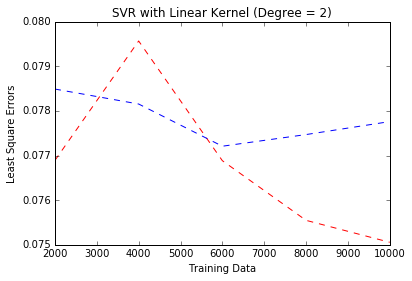

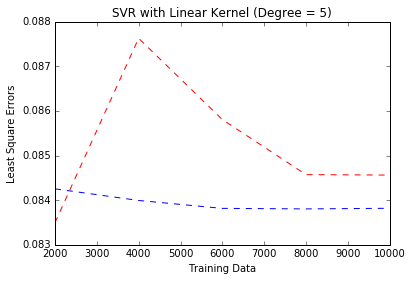

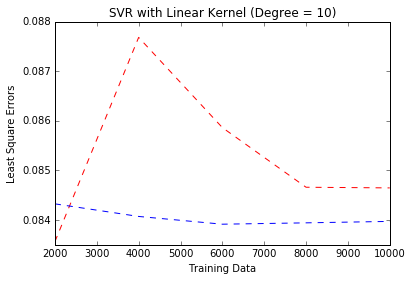

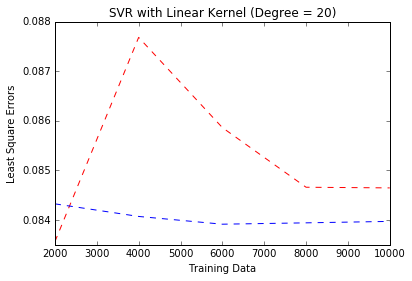

In [42]:
################ Ploting ################
X = [2000, 4000, 6000, 8000, 10000]
train_errors_2 = [train_err_2k_2, train_err_4k_2, train_err_6k_2, train_err_8k_2, train_err_10k_2]
val_errors_2 = [val_err_2k_2, val_err_4k_2, val_err_6k_2, val_err_8k_2, val_err_10k_2]

train_errors_5 = [train_err_2k_5, train_err_4k_5, train_err_6k_5, train_err_8k_5, train_err_10k_5]
val_errors_5 = [val_err_2k_5, val_err_4k_5, val_err_6k_5, val_err_8k_5, val_err_10k_5]

train_errors_10 = [train_err_2k_10, train_err_4k_10, train_err_6k_10, train_err_8k_10, train_err_10k_10]
val_errors_10 = [val_err_2k_10, val_err_4k_10, val_err_6k_10, val_err_8k_10, val_err_10k_10]

train_errors_20 = [train_err_2k_20, train_err_4k_20, train_err_6k_20, train_err_8k_20, train_err_10k_20]
val_errors_20 = [val_err_2k_20, val_err_4k_20, val_err_6k_20, val_err_8k_20, val_err_10k_20]

plt.plot(X, train_errors_2, 'r--', X, val_errors_2, 'b--')
plt.xlabel('Training Data')
plt.ylabel('Least Square Errors')
plt.title('SVR with Linear Kernel (Degree = 2)')
plt.show()

plt.plot(X, train_errors_5, 'r--', X, val_errors_5, 'b--')
plt.xlabel('Training Data')
plt.ylabel('Least Square Errors')
plt.title('SVR with Linear Kernel (Degree = 5)')
plt.show()

plt.plot(X, train_errors_10, 'r--', X, val_errors_10, 'b--')
plt.xlabel('Training Data')
plt.ylabel('Least Square Errors')
plt.title('SVR with Linear Kernel (Degree = 10)')
plt.show()

plt.plot(X, train_errors_20, 'r--', X, val_errors_20, 'b--')
plt.xlabel('Training Data')
plt.ylabel('Least Square Errors')
plt.title('SVR with Linear Kernel (Degree = 20)')
plt.show()